# Рубежный контроль №1 по курсу «Методы машинного обучения»
Подготовил: студент группы ИУ5-22М Ватутин И. А.

## Вариант
- 3, 23 задание
- для произвольной колонки данных построить гистограмму

## Описание датасета
Mental Health Dataset - этот датасет содержит информацию из которой можно составить информацию о ментальном здоровье

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Подгрузим датасет и продемонстрируем его содержимое
data_loaded = pd.read_csv('mental.csv', sep=",")
data_loaded = data_loaded.drop('Timestamp', axis=1)
data_loaded.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


# Задача 1. Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "weight of evidence (WoE) encoding".

In [53]:
# Преобразуем целевую переменную treatment из строкового формата в бинарный формат
data_loaded['treatment'] = data_loaded['treatment'].map({'No': 0, 'Yes': 1})

# Функция для вычисления WoE для каждой категории
def calculate_woe(df, feature, target):
    total_good = df[target].sum()
    total_bad = len(df) - total_good
    category_woe = {}
    for category in df[feature].unique():
        good = df[(df[feature] == category) & (df[target] == 1)].shape[0]
        bad = df[(df[feature] == category) & (df[target] == 0)].shape[0]
        if good == 0:
            good = 0.5
        if bad == 0:
            bad = 0.5
        woe = (good / total_good) / (bad / total_bad)
        category_woe[category] = woe
    return category_woe

woe_encoding_country = calculate_woe(data_loaded, 'Country', 'treatment')
data_loaded['Country_WoE'] = data_loaded['Country'].map(woe_encoding_country)
data_loaded[['Country', 'Country_WoE']]

,Country,Country_WoE
0,United States,1.165581
1,United States,1.165581
2,United States,1.165581
3,United States,1.165581
4,United States,1.165581
...,...,...
292359,United States,1.165581
292360,South Africa,1.526380
292361,United States,1.165581
292362,United States,1.165581


# Задача 2. Для набора данных для одного (произвольного) числового признака проведите обнаружение и удаление выбросов на основе правила трех сигм.

In [54]:
# Подгрузим датасет и продемонстрируем его содержимое
data_loaded = pd.read_csv('spotify.csv', sep=",")
data_loaded = data_loaded.drop('id', axis=1)
data_loaded.head()

,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.0,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.0,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.0,0.0995,0.236,-5.230,148.033,222973,125,512388123
3,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.0,0.3140,0.665,-7.438,167.911,284856,2,11985346
4,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.0,0.0755,0.688,-4.806,97.014,193507,30,301860377


In [55]:
data_loaded.shape

(6513, 18)

In [56]:
def detect_outliers(data, threshold=3):
    mean = data.mean()
    std = data.std()
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std
    return lower_bound, upper_bound

lower_bound, upper_bound = detect_outliers(data_loaded['duration_ms'])

data_without_outliers = data_loaded[(data_loaded['duration_ms'] >= lower_bound) & (data_loaded['duration_ms'] <= upper_bound)]
data_without_outliers.shape

(6417, 18)

# Гистограмма

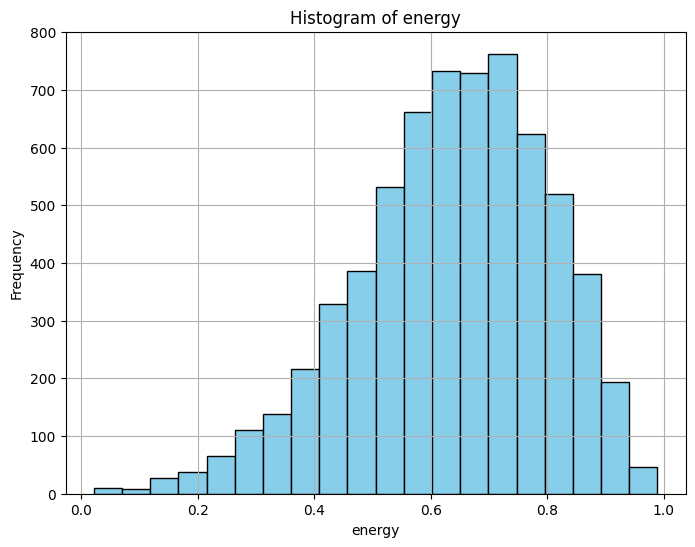

In [57]:
plt.figure(figsize=(8, 6))
plt.hist(data_loaded['energy'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of energy')
plt.xlabel('energy')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()